# Salary Assignment 1: Correlation

### In the next series of challenges, we will predict employee salaries from different employee characteristics (or features). We ask employees working in four different fields to state their salary and some background information. 

### Import the data salary.csv to a Jupyter Notebook and answer the following questions:


In [87]:
# Import necessary packages
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#set up a large font for our pyplot
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# Python's default exception mode is too verbose, let's set it to 'plain'
%xmode plain

Exception reporting mode: Plain


In [4]:
salary = pandas.read_csv("salary.csv")

### Q1 a)	How many responders are there? Are there any missing values in any of the variables?

In [5]:
# function to print out whether there are null values in the records
def showRecordsReport():
    print("There are " + str(len(salary)) + " respondents recorded in the data file.")
    print("Are there any null values: " + str(salary.isnull().values.any()))
    print("Number of null values: " + str(salary.isnull().sum().sum()))
    print("The index/indices of null values: " + str(salary[salary['salary'].isnull()].index.tolist()))
    
showRecordsReport()

There are 514 respondents recorded in the data file.
Are there any null values: True
Number of null values: 1
The index/indices of null values: [208]


### >>> There are 514 respondents in the data file. There is one null value in the records.

### We will now proceed to remove all null value rows...

In [6]:
# keep looping till there are no more null values in the records
while (salary[salary['salary'].isnull()].index.tolist()):
    nullList = salary[salary['salary'].isnull()].index.tolist()
    for index in nullList:
        salary = salary.drop(index)
        break

print("After removing null value rows, there are " + str(len(salary)) + " records left.")
showRecordsReport()

After removing null value rows, there are 513 records left.
There are 513 respondents recorded in the data file.
Are there any null values: False
Number of null values: 0
The index/indices of null values: []


### Now we are left with 513 workable records, that don't contain invalid data.

### Q1b)	What is the lowest salary and highest salary in the group?

In [7]:
# To find the minimum salary, we use the pandas function min()
print("Minimum salary: $" + str(salary.salary.min()) + " per annum.")

Minimum salary: $29000.0 per annum.


In [8]:
# To find the minimum salary, we use the pandas function max()
print("Minimum salary: $" + str(salary.salary.max()) + " per annum.")

Minimum salary: $96156.0 per annum.


### >>> The lowest salary is \$29 000 per annum. The highest salary is \$96 156 per annum.

### Q1c)	What is the mean salary for the sample? Include the standard error of the mean.

In [9]:
# To find the mean, we use the pandas function mean()
print("Mean salary of the sample: $" + str('{:.2f}'.format(salary['salary'].mean())) + " per annum.") #Rounded off to two decimal places

Mean salary of the sample: $50863.22 per annum.


In [10]:
# To find the standard error of the mean, we use the pandas function sem()
print("Standard error of the mean: $" + str('{:.2f}'.format(salary['salary'].sem()))) #Rounded off to two decimal places

Standard error of the mean: $560.06


### >>> The mean salary is \$50 863.22 per annum. The standard error of the mean is \$560.06 per annum.

### Q1d)	What is the standard deviation for the years worked?

In [11]:
# To find standard deviation, we use the pandas function std()
print("Standard deviation of years worked: " + str('{:.2f}'.format(salary['yearsworked'].std())) + " years.") #Rounded off to two decimal places

Standard deviation of years worked: 9.45 years.


### >>> The standard deviation for the years worked is 9.45 years.

### Q1e)	What is the median salary for the sample?

In [12]:
# To find the median, we use the pandas function median()
print("Minimum salary: $" + str(salary.salary.median()) + " per annum.")

Minimum salary: $50096.0 per annum.


### >>> The median for the salary is \$50 096 per annum.

### Q1f)	What is the interquartile range for salary in the sample?

In [13]:
# To find the interquartile range, we use the pandas function quantile()...
print("Lower interquartile range: $" + str(salary['salary'].quantile(.25))) # First-quartitle
print("Middle interquartile range: $" + str(salary['salary'].quantile(.5))) 
print("Upper interquatile range: $" + str(salary['salary'].quantile(.75)))

Lower interquartile range: $40000.0
Middle interquartile range: $50096.0
Upper interquatile range: $60345.0


### >>> The middle interquartile range is \$50 096 per annum. The lower interquartile range is \$40 000 per annum. The upper interquartile range is $60 345 per annum.

### Q1g)	How many men are there in the sample? How many women are there in the sample? Present this information in a table. 

In [14]:
males = salary[salary.male == 1] # subset salary where male is equal to 1 to new dataframe
females = salary[salary.male == 0] # subset salary where male is equal to 0 to new dataframe

In [15]:
# combine the lengths of the two dataframes in a new dataframe
df = pandas.DataFrame([[len(males), len(females)]])
df. columns = [['Males','Females']]
df # display the dataframe as a table

,Males,Females
0,385,128


### >>> There are 385 men, and 128 women in the sample. (Invalid samples not included).

### Q1h)	How many women are executives compared to men? 

In [16]:
# As stated in the metadata, executives are represented as level 3 in the position column
male_execs = males[males['position'] == 3] # subset male executives in a new dataframe
fem_execs = females[females['position']  == 3] # subset female executives in a new dataframe

In [17]:
# Combine the lengths of the two dataframes in a new dataframe and display it as a table
df = pandas.DataFrame([[len(male_execs), len(fem_execs)]])
df. columns = [['Male Executives','Female Executives']] #Give our table columns headings to replace the default numeric indices
df

,Male Executives,Female Executives
0,191,19


### >>> There are 192 male and 19 female executives.

### Q1i)	Create a histogram for the variable Salary.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F321D96B00>]],
      dtype=object)

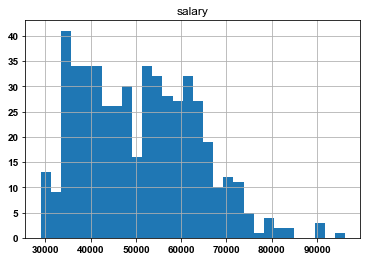

In [19]:
# Call pandas hist() method for this, and ask for 30 bins
salary.hist(column='salary', bins=30)

### Q1j)	Examine the histogram and describe the distribution for Salary.

### >>> Most of the people sampled have a salary between 35k and about 65k.

### Q1k)	Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries? 

In [20]:
labels = ['Male Salaries', 'Female Salaries'] # create a labels list
height = [np.mean(males.salary), np.mean(females.salary)] # list for mean salaries as heights

std = pandas.DataFrame(height).std() # find the standard deviation and store it in std

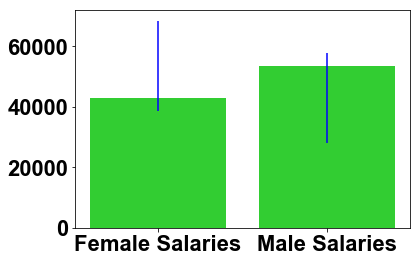

In [52]:
plt.errorbar(0, np.mean(males.salary), yerr=2*std, color='blue') # plot the males salary error bar
plt.errorbar(1, np.mean(females.salary), yerr=2*std, color='blue') # plot the males salary error bar

plt.bar(x = labels, height = height, color='limegreen') #plot the graph
plt.show() # show the graph

### l)	Create a scatterplot showing the relationship between Years Worked and Salary (don’t forget to insert a trend line). What is the relationship between Years Worked and Salary?

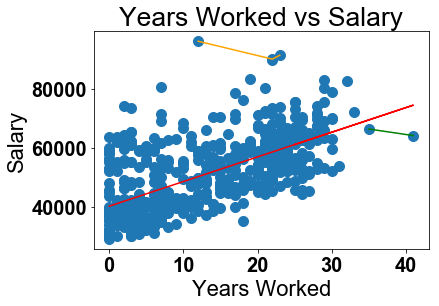

In [113]:
# Create a dataframe from a dictionary with years worked versus salary and plot it
dic = {'Years Worked': salary.yearsworked, 'Salary': salary.salary}
df = pandas.DataFrame(dic)
df.plot(kind='scatter', x='Years Worked', y='Salary', s=100, fontsize=20)

# Now let's add the trendline
z = np.polyfit(dic['Years Worked'], dic['Salary'], 1)
p = np.poly1d(z)
plt.plot(dic['Years Worked'], p(dic['Years Worked']), "red")

# Now let's highlight the outliers...
plt.plot(salary[salary.salary > 90000].yearsworked, salary[salary.salary > 90000].salary, c='orange')
plt.plot(salary[salary.yearsworked >= 35].yearsworked, salary[salary.yearsworked >= 35].salary, c='green')
plt.title('Years Worked vs Salary')
plt.show()

### >>> As can be seen from the trend line in red, there's a positive correlation between years worked and salary. As we move further to the right on the x-axis, amounts generally go higher on the y-axis. This means the longer you've worked, the more likely you are to earn a higher salary.

### l)1) Describe any patterns in the scatterplot. Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)

In [110]:
#display salaries above 90 000
salary[salary.salary > 90000]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
280,91405.0,0,23,14,1.18,1,0,3,1,1,0
371,90082.0,10,22,22,1.00,1,0,3,1,2,2
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


In [111]:
# display years worked that are or above 35
salary[salary.yearsworked >= 35]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
364,66334.0,0,35,23,0.78,1,0,3,1,1,0
382,64109.0,0,41,28,0.91,1,0,3,1,2,0


### >>> There are five outliers that are of particular interest.
### - First, the three outliers at the top of the graph marked with an orange line. These outliers earn more than 90 000 per annum, which is unusually high.
### - Also, the two outliers on the right marked with a green line. These outliers have worked for more than 35 and more years, unusually longer than others.

In [107]:
# This cell is a work in progress. Please ignore it for now
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

### l)	Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function

In [108]:
help(scipy.stats.pearsonr) #display help for pearsonr() function

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Calculate a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed, and not necessarily zero-mean.
    Like other correlation coefficients, this one varies between -1 and +1
    with 0 implying no correlation. Correlations of -1 or +1 imply an exact
    linear relationship. Positive correlations imply that as x increases, so
    does y. Negative correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 5

### ??? 1.	Interpret the size and direction of the correlation statistic.

In [109]:
# call pearsonr() function and store what's returned in 'result', then display values
result = stats.pearsonr(salary.yearsworked, salary.salary)
print("r = " + str(result[0]))
print("p = " + '{:}'.format(result[1]))

r = 0.6235888657598045
p = 1.2873351342921916e-56


### >>> Pearson's correlation coefficient (r) between Years Worked and Salary is 0.6235888657598045. This correlation is positive and farely moderate. The variance explained (r-squared) 0.3888630734995995, meaning about 39% of the variance in salary is being explained in the variance in years worked.

### 2.	Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer. 

### Yes. The correlation statistic is significant because the probability that the relationship is pure chance is significantly small (p = 1.2873351342921916e-56), particularly, smaller than 0.05 (5%, which is the standard cut-off point for probability). 